In [269]:
%matplotlib inline


# standard library
import os
import time
from pathlib import Path

# data munging
import pandas as pd
import numpy as np

# model building
from sklearn.ensemble import RandomForestClassifier

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

np.random.seed(42)

plt.style.use(style="seaborn")
# plt.rcParams['figure.dpi'] = 400
sns.set_style('whitegrid')



In [270]:
!nvidia-smi

Thu Jul 14 05:19:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 516.40       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
|  0%   60C    P2    52W / 200W |   2847MiB /  4096MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [271]:
################################################

ticker_list = ["aapl", "amzn", "msft"]

ticker = ticker_list[1]

ticker_upper = ticker.upper()

print("Ticker:", ticker_upper)

################################################

source_list = ["BENZINGA", "TWINT"]

source = source_list[0]

print("Source:", source)

################################################

model_type_list = ["random_forest"]

model_type = model_type_list[0]

print("Model Type:", model_type.upper())

################################################

include_logged_returns = True

print("Include Logged Returns:", include_logged_returns)

################################################



Ticker: AMZN
Source: BENZINGA
Model Type: RANDOM_FOREST
Include Logged Returns: True


In [272]:
csv_path = f"/app/StockPricePredictions/data/alphavantage/time_series_daily_adjusted/{ticker_upper}/{ticker_upper}_WITH_{source}_FINBERT_SA.csv"

In [273]:
df = pd.read_csv(csv_path)
df.sort_values(by=["date"], ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

date_time = pd.to_datetime(df.pop('date'))

df.index = date_time

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3064 entries, 2010-01-04 to 2022-03-04
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   1. open               3064 non-null   float64
 1   2. high               3064 non-null   float64
 2   3. low                3064 non-null   float64
 3   4. close              3064 non-null   float64
 4   5. adjusted close     3064 non-null   float64
 5   6. volume             3064 non-null   float64
 6   7. dividend amount    3064 non-null   float64
 7   8. split coefficient  3064 non-null   float64
 8   date_time             3064 non-null   object 
 9   day_of_week           3064 non-null   int64  
 10  return                3064 non-null   float64
 11  increase              3064 non-null   float64
 12  log_return            3064 non-null   float64
 13  negative              3064 non-null   float64
 14  nuetral               3064 non-null   float64
 15  pos

In [275]:
df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,date_time,day_of_week,return,increase,log_return,negative,nuetral,positive
date,,,,,,,,,,,,,,,,
2010-01-04,136.25,136.610,133.14,133.90,133.90,7599900.0,0.0,1.0,2010-01-04,0,0.000000,0.0,0.000000,0.0,0.0,0.0
2010-01-05,133.43,135.479,131.81,134.69,134.69,8851900.0,0.0,1.0,2010-01-05,1,0.005900,1.0,0.005883,0.0,0.0,0.0
2010-01-06,134.60,134.730,131.65,132.25,132.25,7178800.0,0.0,1.0,2010-01-06,2,-0.018116,0.0,-0.018282,0.0,0.0,0.0
2010-01-07,132.01,132.320,128.80,130.00,130.00,11030200.0,0.0,1.0,2010-01-07,3,-0.017013,0.0,-0.017160,0.0,0.0,0.0
2010-01-08,130.56,133.680,129.03,133.52,133.52,9830500.0,0.0,1.0,2010-01-08,4,0.027077,1.0,0.026717,0.0,0.0,0.0


In [276]:
df.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,date_time,day_of_week,return,increase,log_return,negative,nuetral,positive
date,,,,,,,,,,,,,,,,
2022-02-28,3048.50,3089.00,3017.00,3071.26,3071.26,2884171.0,0.0,1.0,2022-02-28,0,-0.001466,0.0,-0.001467,0.434618,0.451638,0.113744
2022-03-01,3054.65,3081.98,2999.54,3022.84,3022.84,2243679.0,0.0,1.0,2022-03-01,1,-0.015766,0.0,-0.015891,0.600509,0.265521,0.133970
2022-03-02,3016.98,3059.99,2975.00,3041.05,3041.05,2366736.0,0.0,1.0,2022-03-02,2,0.006024,1.0,0.006006,0.368508,0.540080,0.091412
2022-03-03,3070.63,3078.58,2937.12,2957.97,2957.97,3259860.0,0.0,1.0,2022-03-03,3,-0.027320,0.0,-0.027700,0.133283,0.630151,0.236567
2022-03-04,2943.18,2957.00,2876.14,2912.82,2912.82,3049156.0,0.0,1.0,2022-03-04,4,-0.015264,0.0,-0.015382,0.511864,0.461260,0.026875


In [277]:
df["return"] = df["return"].shift(-1)
df["increase"] = df["increase"].shift(-1)

In [278]:
df.head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,date_time,day_of_week,return,increase,log_return,negative,nuetral,positive
date,,,,,,,,,,,,,,,,
2010-01-04,136.25,136.610,133.14,133.90,133.90,7599900.0,0.0,1.0,2010-01-04,0,0.005900,1.0,0.000000,0.0,0.0,0.0
2010-01-05,133.43,135.479,131.81,134.69,134.69,8851900.0,0.0,1.0,2010-01-05,1,-0.018116,0.0,0.005883,0.0,0.0,0.0
2010-01-06,134.60,134.730,131.65,132.25,132.25,7178800.0,0.0,1.0,2010-01-06,2,-0.017013,0.0,-0.018282,0.0,0.0,0.0
2010-01-07,132.01,132.320,128.80,130.00,130.00,11030200.0,0.0,1.0,2010-01-07,3,0.027077,1.0,-0.017160,0.0,0.0,0.0
2010-01-08,130.56,133.680,129.03,133.52,133.52,9830500.0,0.0,1.0,2010-01-08,4,-0.024056,0.0,0.026717,0.0,0.0,0.0


In [279]:
df.tail()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,date_time,day_of_week,return,increase,log_return,negative,nuetral,positive
date,,,,,,,,,,,,,,,,
2022-02-28,3048.50,3089.00,3017.00,3071.26,3071.26,2884171.0,0.0,1.0,2022-02-28,0,-0.015766,0.0,-0.001467,0.434618,0.451638,0.113744
2022-03-01,3054.65,3081.98,2999.54,3022.84,3022.84,2243679.0,0.0,1.0,2022-03-01,1,0.006024,1.0,-0.015891,0.600509,0.265521,0.133970
2022-03-02,3016.98,3059.99,2975.00,3041.05,3041.05,2366736.0,0.0,1.0,2022-03-02,2,-0.027320,0.0,0.006006,0.368508,0.540080,0.091412
2022-03-03,3070.63,3078.58,2937.12,2957.97,2957.97,3259860.0,0.0,1.0,2022-03-03,3,-0.015264,0.0,-0.027700,0.133283,0.630151,0.236567
2022-03-04,2943.18,2957.00,2876.14,2912.82,2912.82,3049156.0,0.0,1.0,2022-03-04,4,NaN,NaN,-0.015382,0.511864,0.461260,0.026875


In [280]:
df.fillna(0.0, inplace=True)

In [281]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1. open,3064.0,1.095358e+03,1.062551e+03,105.925000,2.587150e+02,6.171450e+02,1.770055e+03,3.744000e+03
2. high,3064.0,1.106956e+03,1.074210e+03,111.290000,2.614875e+02,6.251850e+02,1.786257e+03,3.773078e+03
3. low,3064.0,1.082360e+03,1.049357e+03,105.800000,2.565850e+02,6.057650e+02,1.749290e+03,3.696793e+03
4. close,3064.0,1.094912e+03,1.061586e+03,108.610000,2.590100e+02,6.169900e+02,1.768955e+03,3.731410e+03
5. adjusted close,3064.0,1.094912e+03,1.061586e+03,108.610000,2.590100e+02,6.169900e+02,1.768955e+03,3.731410e+03
6. volume,3064.0,4.453434e+06,2.702337e+06,881337.000000,2.807655e+06,3.760600e+06,5.240026e+06,4.242110e+07
7. dividend amount,3064.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
8. split coefficient,3064.0,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
day_of_week,3064.0,2.022846e+00,1.399408e+00,0.000000,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
return,3064.0,1.201895e-03,1.986214e-02,-0.126568,-8.492083e-03,1.009674e-03,1.130947e-02,1.574570e-01


Text(0.5, 0, 'Date')

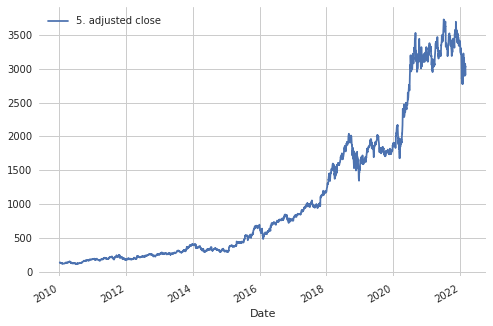

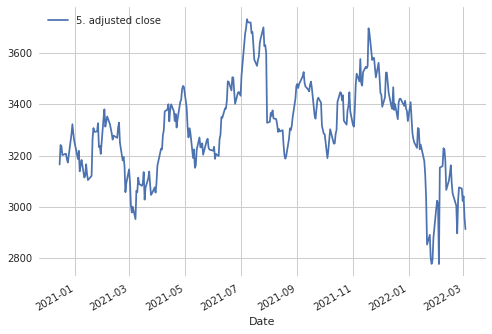

In [282]:
plot_cols = ['5. adjusted close']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
plt.xlabel('Date')

plot_features = df[plot_cols][2757:]
plot_features.index = date_time[2757:]
_ = plot_features.plot(subplots=True)
plt.xlabel('Date')

Text(0.5, 1.0, 'Logged Returns')

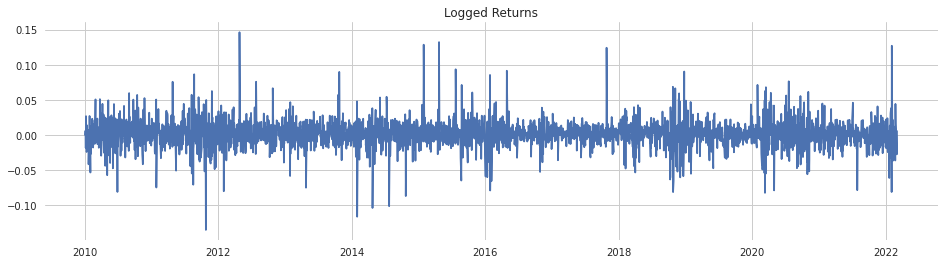

In [283]:
plt.figure(1, figsize=(16, 4))
plt.plot(df.log_return)
plt.title("Logged Returns")

In [284]:
if model_type == "random_forest":
    X = df[["log_return", "2. high", "3. low", "6. volume", "negative", "nuetral", "positive"]]
    y = df["increase"]



#### Train test split

In [285]:
split = int(len(X) * 0.9)
print(split)

2757


In [286]:
X_train = X[:split]
X_test = X[split : len(X)]
y_train = y[:split]
y_test = y[split : len(y)]

In [287]:
print(len(X_train))
print(len(X_test))

2757
307


In [288]:
assert len(X_train) == len(y_train)
assert len(X_test) == len(y_test)

In [289]:
rfc = RandomForestClassifier(n_estimators=1000, criterion="entropy")
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [290]:
preds = rfc.predict(X_test)

In [291]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [292]:
matrix = confusion_matrix(y_test[-244:], preds[-244:])
matrix

array([[71, 52],
       [63, 58]])

In [293]:
score = accuracy_score(y_test[-244:], preds[-244:])
score

0.5286885245901639

In [294]:
print(classification_report(y_test[-244:], preds[-244:]))

              precision    recall  f1-score   support

         0.0       0.53      0.58      0.55       123
         1.0       0.53      0.48      0.50       121

    accuracy                           0.53       244
   macro avg       0.53      0.53      0.53       244
weighted avg       0.53      0.53      0.53       244



In [295]:
y_test.head()

date
2020-12-15    1.0
2020-12-16    0.0
2020-12-17    0.0
2020-12-18    1.0
2020-12-21    1.0
Name: increase, dtype: float64

In [296]:
len(preds)

307

In [297]:
df_compare = pd.DataFrame({"increase":y_test[-244:].copy()})

In [298]:
df_compare["pred_increase"] = preds[-244:].copy()

In [299]:
df_compare

,increase,pred_increase
date,,
2021-03-18,1.0,1.0
2021-03-19,1.0,1.0
2021-03-22,1.0,1.0
2021-03-23,0.0,1.0
2021-03-24,0.0,0.0
...,...,...
2022-02-28,0.0,1.0
2022-03-01,1.0,1.0
2022-03-02,0.0,1.0


In [300]:
df_compare = df_compare.drop("2022-03-04")


### Postive Increase Prediction %

In [301]:
df_compare[(df_compare["increase"]==1) & (df_compare["pred_increase"]==1)].shape[0] / df_compare[(df_compare["increase"]==1)].shape[0]

0.4793388429752066

### Negative Increase Prediction %

In [302]:
df_compare[(df_compare["increase"]==0) & (df_compare["pred_increase"]==0)].shape[0] / df_compare[(df_compare["increase"]==0)].shape[0]

0.5737704918032787

### Overall Prediction Accuracy %

In [303]:
df_compare[(df_compare["increase"] == df_compare["pred_increase"])].shape[0] / (df_compare.shape[0])

0.5267489711934157

### Actual Distribution of Increase (1) vs. Decrease (0)

In [304]:
df_compare["increase"].value_counts()

0.0    122
1.0    121
Name: increase, dtype: int64

In [305]:
df_compare["increase"].value_counts(normalize=True)

0.0    0.502058
1.0    0.497942
Name: increase, dtype: float64

### Predicted Distribution of Increase (1) vs. Decrease (0)

In [306]:
df_compare["pred_increase"].value_counts()

0.0    133
1.0    110
Name: pred_increase, dtype: int64

In [307]:
df_compare["pred_increase"].value_counts(normalize=True)

0.0    0.547325
1.0    0.452675
Name: pred_increase, dtype: float64

In [308]:
from sklearn.metrics import confusion_matrix, classification_report

In [309]:
class_names = ["Down", "Up"]

In [310]:
print(classification_report(df_compare["increase"], df_compare["pred_increase"], target_names=class_names, digits=4))

              precision    recall  f1-score   support

        Down     0.5263    0.5738    0.5490       122
          Up     0.5273    0.4793    0.5022       121

    accuracy                         0.5267       243
   macro avg     0.5268    0.5266    0.5256       243
weighted avg     0.5268    0.5267    0.5257       243



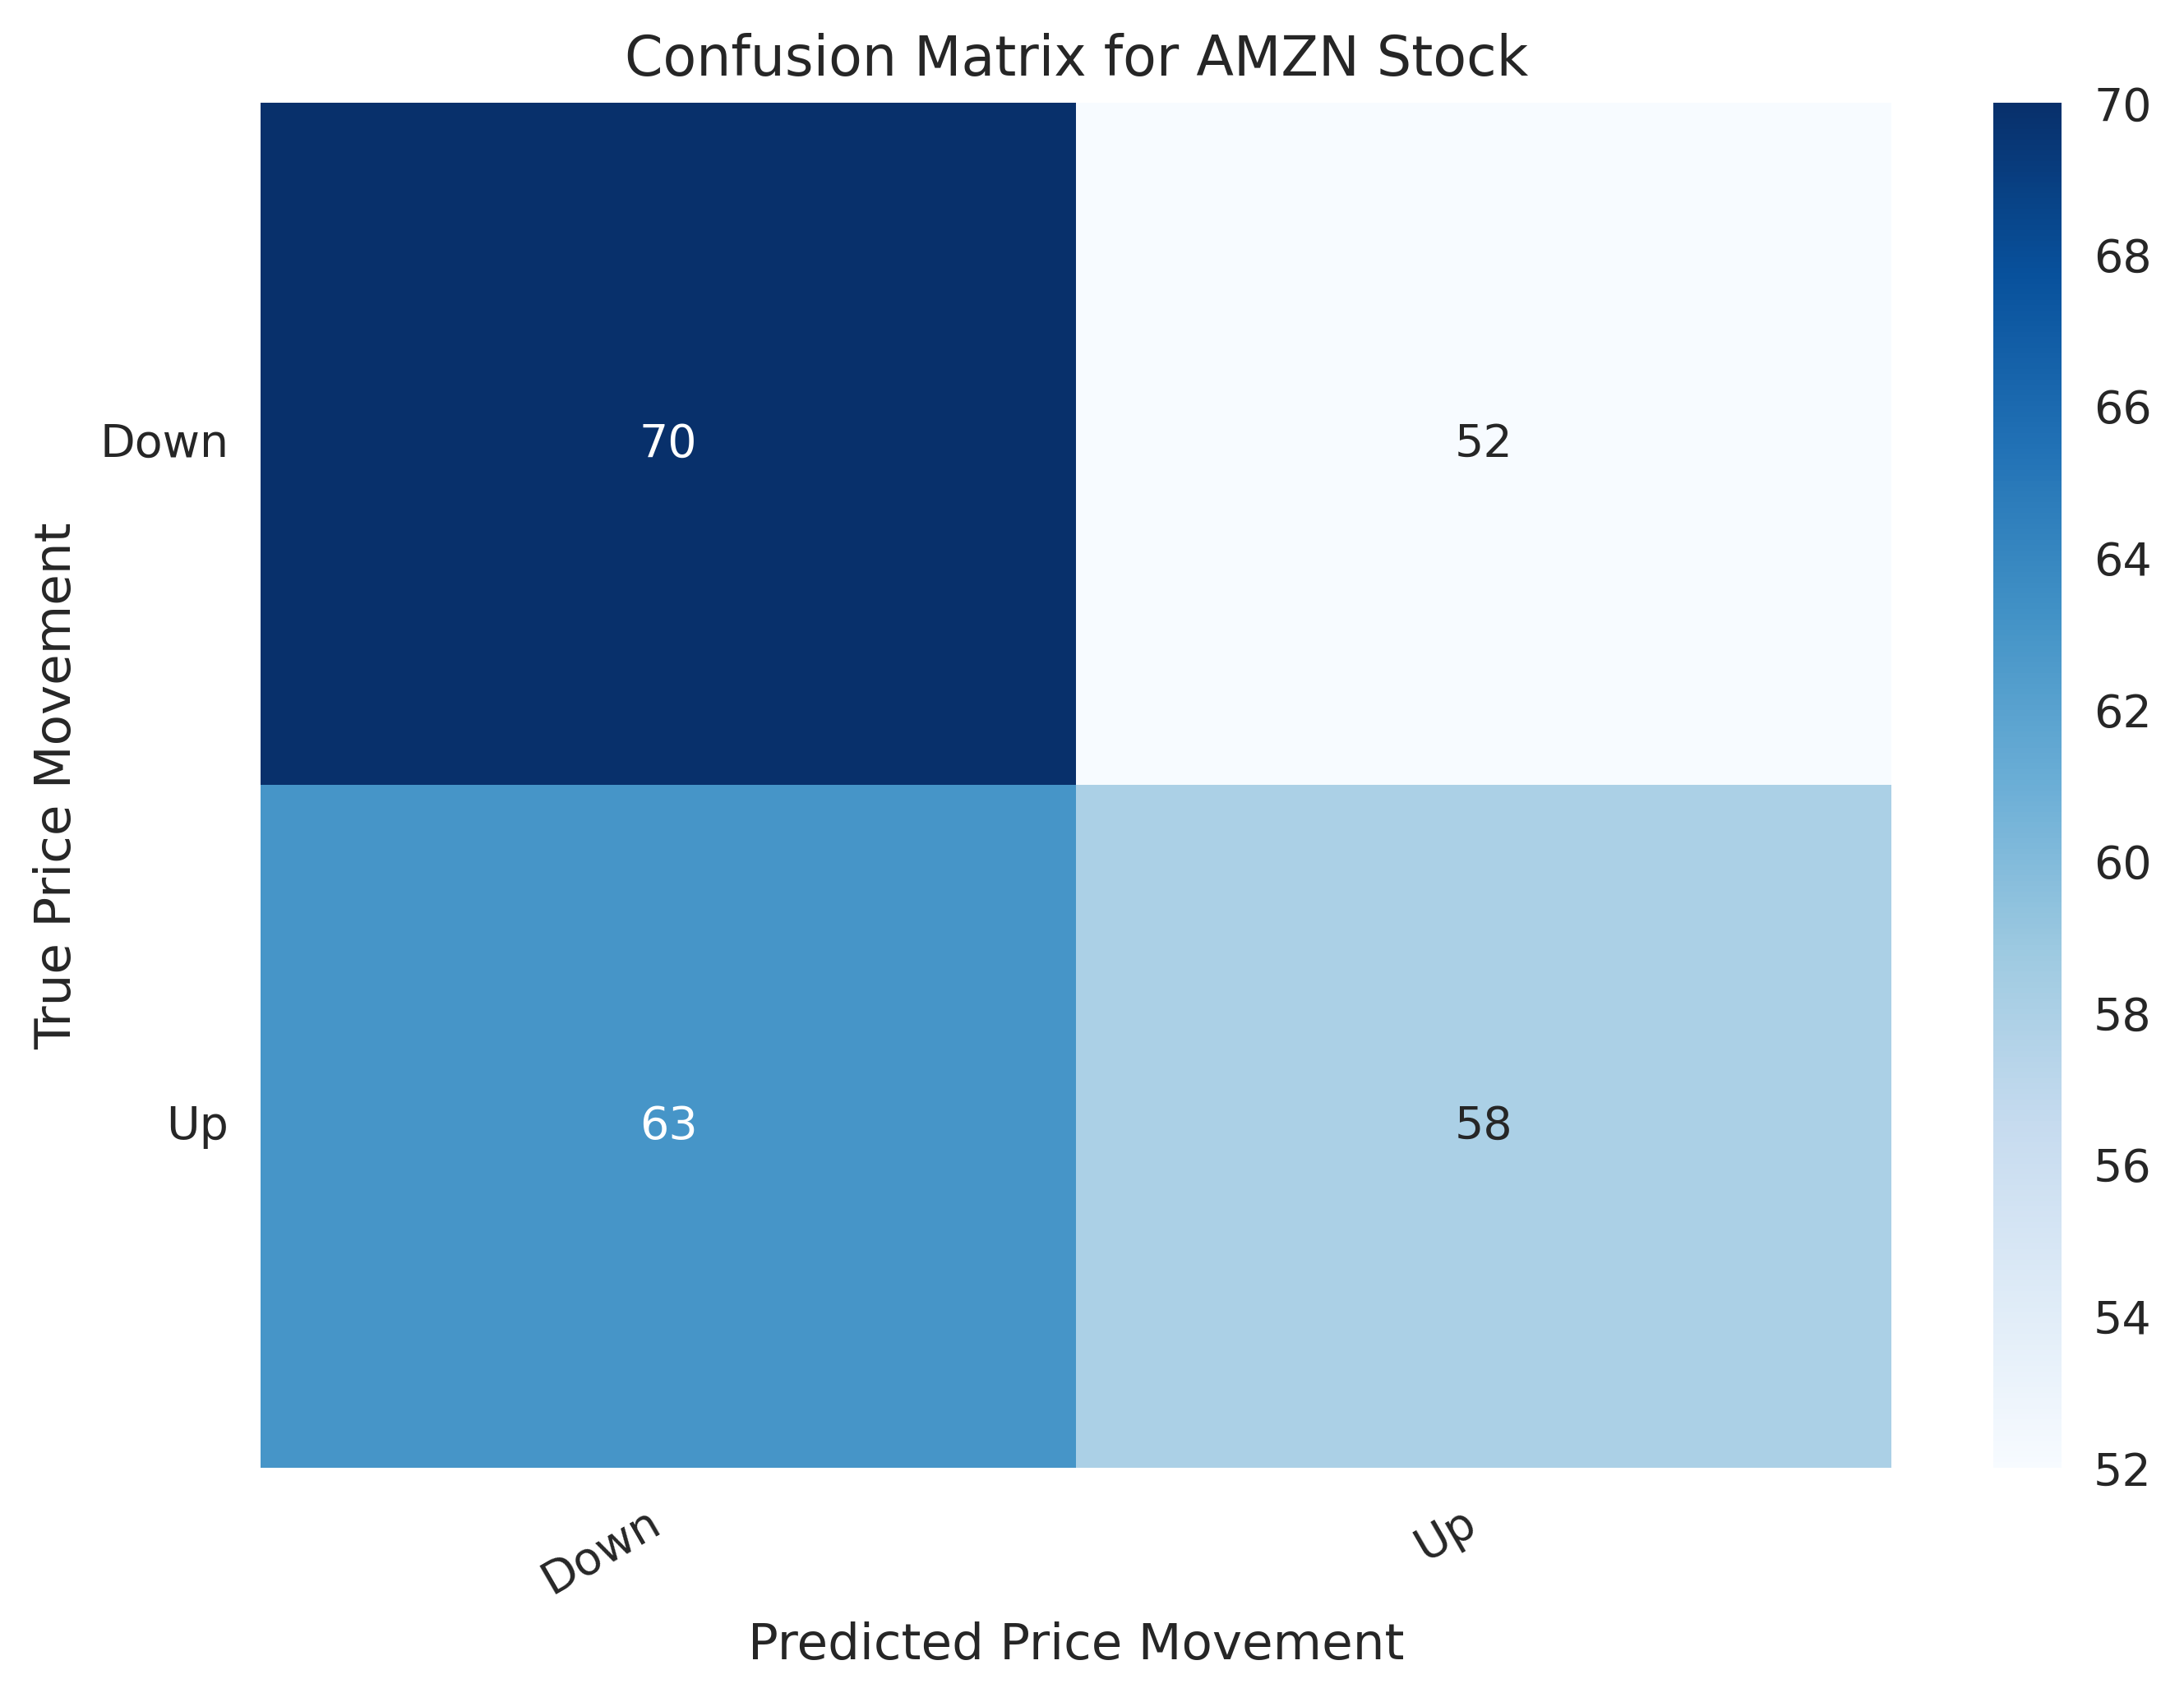

In [311]:
plt.rcParams['figure.dpi'] = 400

def plot_confusion_matrix(confusion_matrix):
  hm = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right')
  hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.title(f'Confusion Matrix for {ticker_upper} Stock')
  plt.ylabel('True Price Movement')
  plt.xlabel('Predicted Price Movement');


cm = confusion_matrix(df_compare["increase"], df_compare["pred_increase"])
df_ = pd.DataFrame(cm, index=class_names, columns=class_names)
plot_confusion_matrix(df_)